In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(dplyr))
suppressMessages(library(reshape2))
suppressMessages(library(data.table))

In [2]:
load("../data/brfss2013")
df <- brfss2013

In [3]:
nrow(brfss2013)

[1] 491775

### Data

The BRFSS data is a random sample of adults 18 years or older from all US states and outlying territories. The survey questions are asked on a landline phone or cell phone from residential households where they select a random adult or from college housing. Cell phones are also used for contact purposes. The survey could potentially be a stratified sample (groups separated by college and non college housing) but it doesn't appear this is the case. This is not random assignment as no procedures are being performed to assign participants to control or experimental groups.

### Research Question (RQ) 1
   Does household income correlate with a decision to not seek medical attention when needed based on a respondents sex?
    
### Reason for Interest
   I don't think I've seen a statistical analysis addressing this specific correlation, though I'm 
    sure it has been done. I'm curious to see if there is a decision difference amongst the sexes, 
    about medical care, regarding their financial situation.

### Exploratory Data Analysis (EDA) for RQ1

In [4]:
med <- (
    
    df %>%  
    select(medcost, income2, sex) %>%
    drop_na()
    
)

In [5]:
head(med)

medcost,income2,sex
<fct>,<fct>,<fct>
No,"Less than $75,000",Female
No,"$75,000 or more",Female
No,"$75,000 or more",Female
No,"Less than $75,000",Female
No,"Less than $50,000",Male
No,"$75,000 or more",Female


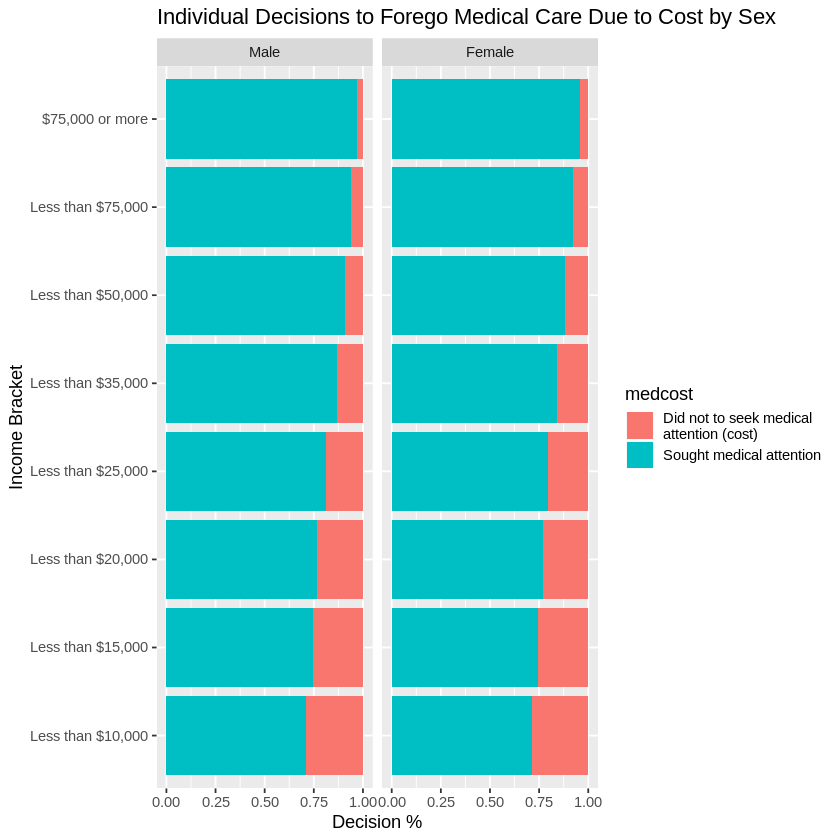

In [6]:
ggplot(med, aes(x=income2, fill=medcost))+ geom_bar(position="fill") + 
    coord_flip() + facet_wrap(~sex) + 
    labs(title="Individual Decisions to Forego Medical Care Due to Cost by Sex",
        x ="Income Bracket", y = "Decision %") + 
    scale_fill_discrete(name = "medcost", labels = c("Did not to seek medical \nattention (cost)", "Sought medical attention"))

### Summary Statistics for RQ1

In [8]:
new_df <- 
(
    med %>%  
    group_by(medcost, income2, sex) %>% 
    tally() %>%
    spread(medcost, n) %>%
    unite("income_by_sex", income2:sex) %>%
    mutate(total=rowSums(select_if(., is.numeric)))
)


In [9]:
pcts <- new_df %>% select(2:3)
pcts <- pcts/rowSums(pcts)
names(pcts) <- c("pct_cost_issue", "pct_cost_not_issue")
final_df <- cbind(new_df, pcts)
setnames(final_df, old=c("Yes","No"), new=c("count_cost_issue", "count_cost_not"))
summary_df <-final_df[order(-final_df$pct_cost_issue),]
summary_df

,income_by_sex,count_cost_issue,count_cost_not,total,pct_cost_issue,pct_cost_not_issue
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,"Less than $10,000_Male",2400,5862,8262,0.29048656,0.7095134
2,"Less than $10,000_Female",4888,12172,17060,0.28651817,0.7134818
4,"Less than $15,000_Female",4513,12998,17511,0.25772372,0.7422763
3,"Less than $15,000_Male",2320,6847,9167,0.25308171,0.7469183
6,"Less than $20,000_Female",5177,17066,22243,0.23274738,0.7672526
5,"Less than $20,000_Male",2896,9613,12509,0.23151331,0.7684867
8,"Less than $25,000_Female",5339,20607,25946,0.20577353,0.7942265
7,"Less than $25,000_Male",2945,12731,15676,0.18786680,0.8121332
10,"Less than $35,000_Female",4608,24575,29183,0.15790015,0.8420999


### Narrative RQ1

To address the research question, I filtered the BRFSS2013 data by medcost, sex and income (specifically the income2 column). I grouped all the data by the column headers and counted the totals of each grouping (a total of 15 groups). Percentages were taken upon whether a group didn't seek medical attention when needed. The figure reflects the information in the summary statistics where regardless of sex, if individuals in that group make less than 10,000 dollars, more of them are likely to have responded yes, they DID NOT seek medical attention when needed. One could deduce from this information that it is likely due to the high cost of medical care. A larger percentage of income would have to be spend on getting care. A confounding variable to this data could be on the amount charged to the individual. If an individual making less than 10,000 dollars is charged significantly more than a person with an income in a different bracket then one could speculate they would be more likely to not seek healthcare and so then this wouldn't be reflected in the data. Income and medical decisions are not disjoint, however, they can potentially be dependent or independent hinging on the person making the decision.

### Research Question (RQ) 2
   Are individuals whom are told they have diabetes, on average, heavier than those who have not been told they have diabetes according to their sex?
    
### Reason for Interest
   I have always been told that this is the case. I wanted to see it for myself
    
### Exploratory Data Analysis (EDA) for RQ2

In [177]:
diab <- 
(
    df %>% 
    select(weight2, diabete3, sex) %>% 
    drop_na() %>%
    transform(weight2 = as.numeric(weight2)) %>%
    filter(weight2 > 50)
)

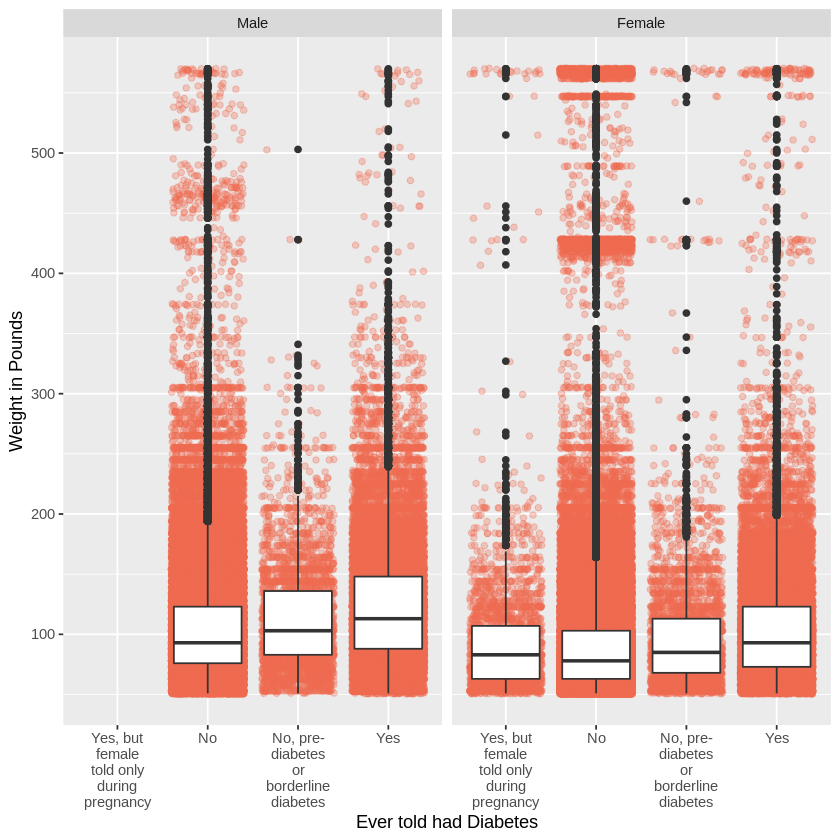

In [122]:
ggplot(diab, aes(x=reorder(diabete3, weight2, FUN=median), y=weight2)) + 
    geom_point(alpha=0.3, color="coral2", position = "jitter") +
    geom_boxplot() + 
    facet_wrap(~sex) +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
    labs(x="Ever told had Diabetes", y="Weight in Pounds")


### Summary Statistics for RQ2

In [180]:
final_diab <- diab %>% 
        mutate(diab_sex = paste(sep="_", diabete3, sex)) %>% 
        select(weight2, diab_sex) %>% group_by(diab_sex) %>%
        summarise_all(list(mean, median, min, max, sd), na.rm = TRUE)
setnames(final_diab, old=c("fn1","fn2", "fn3", "fn4", "fn5"), 
         new=c("mean", "median", "min", "max", "sd"))
final_diab

diab_sex,mean,median,min,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No_Female,94.89519,78,51,570,71.34318
No_Male,103.61502,93,51,570,43.61144
"No, pre-diabetes or borderline diabetes_Female",100.75659,85,51,570,59.33102
"No, pre-diabetes or borderline diabetes_Male",114.42009,103,51,503,46.75810
Yes_Female,104.98165,93,51,570,54.21146
Yes_Male,123.54328,113,51,570,51.27004
"Yes, but female told only during pregnancy_Female",96.84370,83,51,570,62.94709


### Narrative RQ2

I was seeking to determine whether individuals with diabetes weighed more, on average, than those who did not. I must admit this data was difficult to interpret. The data mentioned interviewing adults over 18 and yet there were some weight values at 0. After removing all the NA values, I selected all answers where the weight was above 50 pounds. I'm making an educated guess that most individuals over 18 will weight more than 50 pounds. As a maximum both the summary stats and figure show 570 as a max except for 'No, pre-diabetes or borderline diabetes_Males'. It seems like an arbitrary cutoff and I can't figure out why it's like that. Regardless, according to the summary stats, both males and females with diabetes weighed more, on average, than those who didn't ahve diabetes. There are, of course, outliers where very heavy individuals don't and lighter individuals do have diabetes. It would be interesting to break this data out further into type I and II diabetes to see if there is any correlation between weight and type.

### Research Question (RQ) 3
   Does higher education level equate to higher income?
    
### Reason for Interest
   It's always interesting to work with commonly discussed stats and confirm or refute those previous facts. In this case I wanted to see if income and education level were correlated
### Exploratory Data Analysis (EDA) for RQ3

In [221]:
eduin <- df %>% select(income2, educa) %>% drop_na()

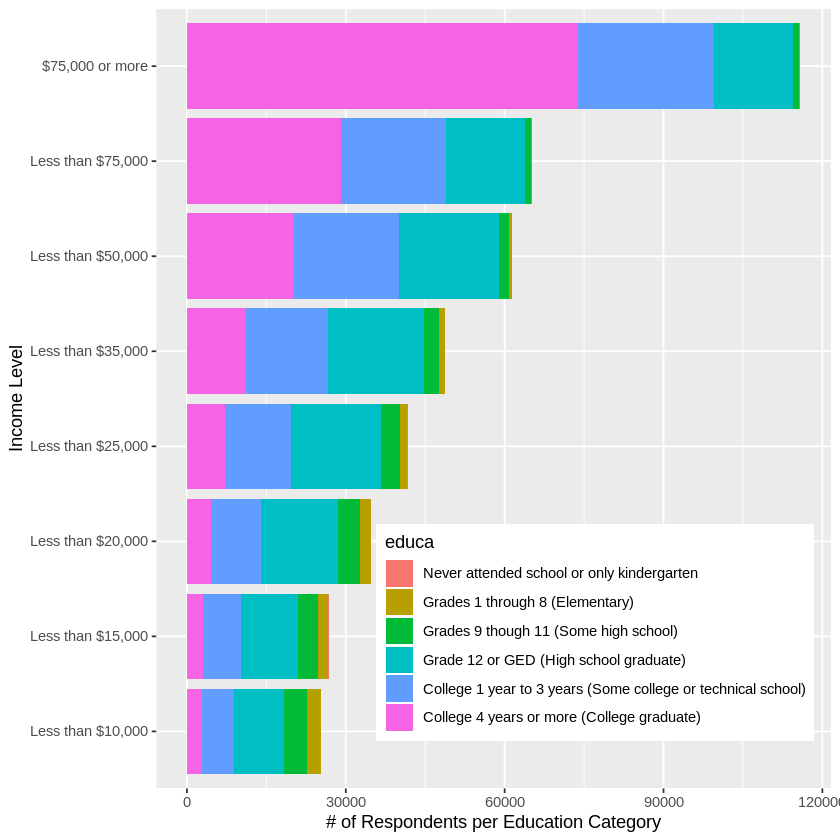

In [222]:
ggplot(eduin, aes(x=income2, fill=educa)) + 
    geom_bar(stat='count') + coord_flip() +
    theme(legend.position = c(0.65, 0.2)) +
    labs(y="# of Respondents per Education Category", x="Income Level")

### Summary Statistics for RQ2

In [347]:
testt <- 
(
    eduin %>% 
    group_by(income2, educa) %>% 
    tally() %>% 
    spread(educa, n) %>% 
    as.data.frame()
)

de <- testt$income2 %>% as.data.frame()

test <- 
(
    testt %>% 
    select(-income2) %>% 
    mutate(total=rowSums(select_if(., is.numeric)))
)

pcts <- testt %>% 
    select(-income2)
pcts <- pcts/rowSums(pcts)

eduindf <- cbind(de, test, pcts)
eduindf

.,Never attended school or only kindergarten,Grades 1 through 8 (Elementary),Grades 9 though 11 (Some high school),Grade 12 or GED (High school graduate),College 1 year to 3 years (Some college or technical school),College 4 years or more (College graduate),total,Never attended school or only kindergarten,Grades 1 through 8 (Elementary),Grades 9 though 11 (Some high school),Grade 12 or GED (High school graduate),College 1 year to 3 years (Some college or technical school),College 4 years or more (College graduate)
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Less than $10,000",121,2600,4270,9413,6104,2873,25381,0.0047673457,0.102438832,0.168236082,0.3708680,0.2404949,0.1131949
"Less than $15,000",73,1993,3714,10837,7087,3037,26741,0.0027298904,0.074529748,0.138887850,0.4052578,0.2650237,0.1135709
"Less than $20,000",78,2015,4126,14513,9606,4455,34793,0.0022418303,0.057913948,0.118587072,0.4171241,0.2760900,0.1280430
"Less than $25,000",50,1420,3516,16999,12510,7165,41660,0.0012001920,0.034085454,0.084397504,0.4080413,0.3002880,0.1719875
"Less than $35,000",52,1131,2872,18153,15396,11191,48795,0.0010656830,0.023178604,0.058858490,0.3720258,0.3155241,0.2293473
"Less than $50,000",31,566,1954,18857,19798,20249,61455,0.0005044341,0.009209991,0.031795623,0.3068424,0.3221544,0.3294931
"Less than $75,000",23,243,1062,14848,19865,29145,65186,0.0003528365,0.003727794,0.016291842,0.2277790,0.3047433,0.4471052
"$75,000 or more",28,288,1003,15040,25651,73800,115810,0.0002417753,0.002486832,0.008660737,0.1298679,0.2214921,0.6372507


### Narrative RQ3

Per the other two research questions I grabbed the income2 and educa columns and removed any NA values. As one would those with mroe education tended to make more money. The percentages and plot reflect this information with a full 64 percent of those that went to college making more than 75k per year. Almost none of those who didn't complete highschool make more than 74k per year. Most of this information is in line with what one would expect.